#TAG SMART EMAILS

GENSIM AND LDA

https://radimrehurek.com/gensim/apiref.html

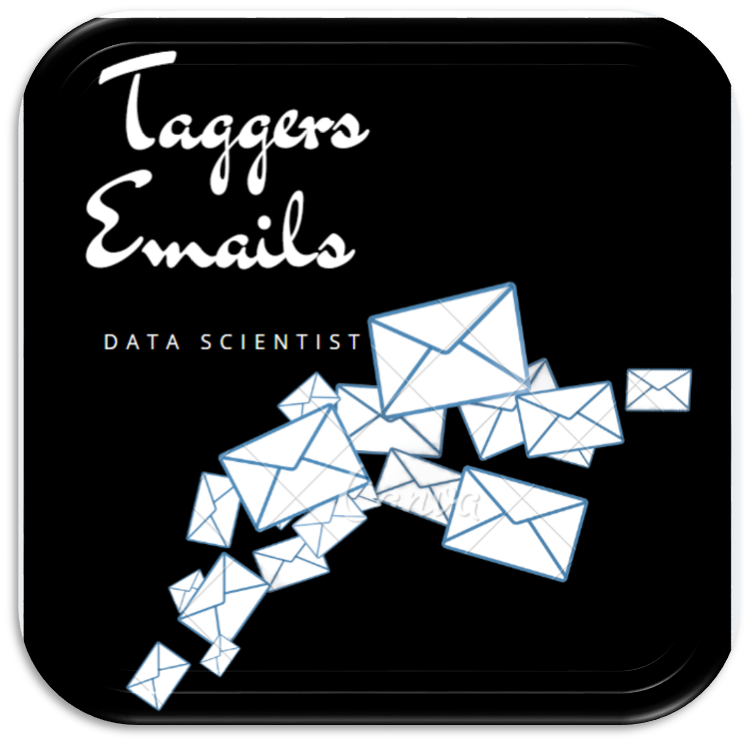

In [ ]:
from PIL import Image
# load the image
logo = Image.open('logo tags.png')
logo

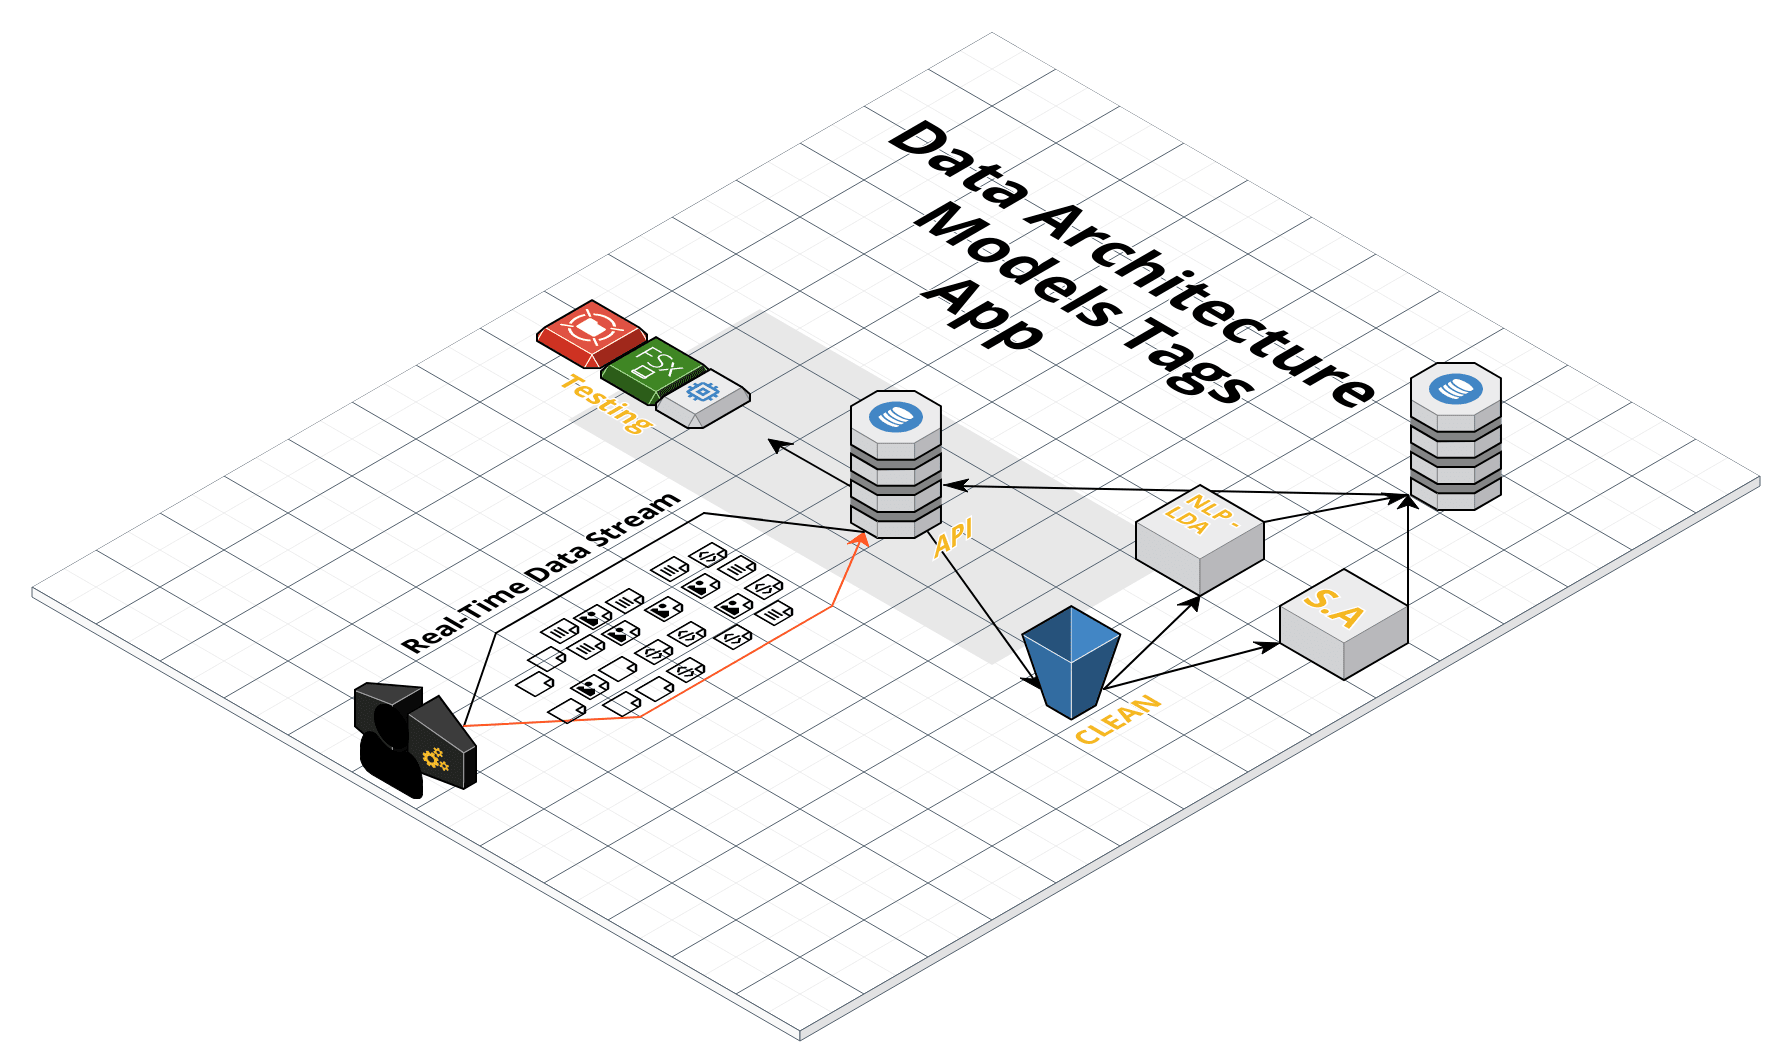

In [ ]:
from PIL import Image
# load the image
Arquitecture = Image.open('Streaming Data Architecture.png')
Arquitecture

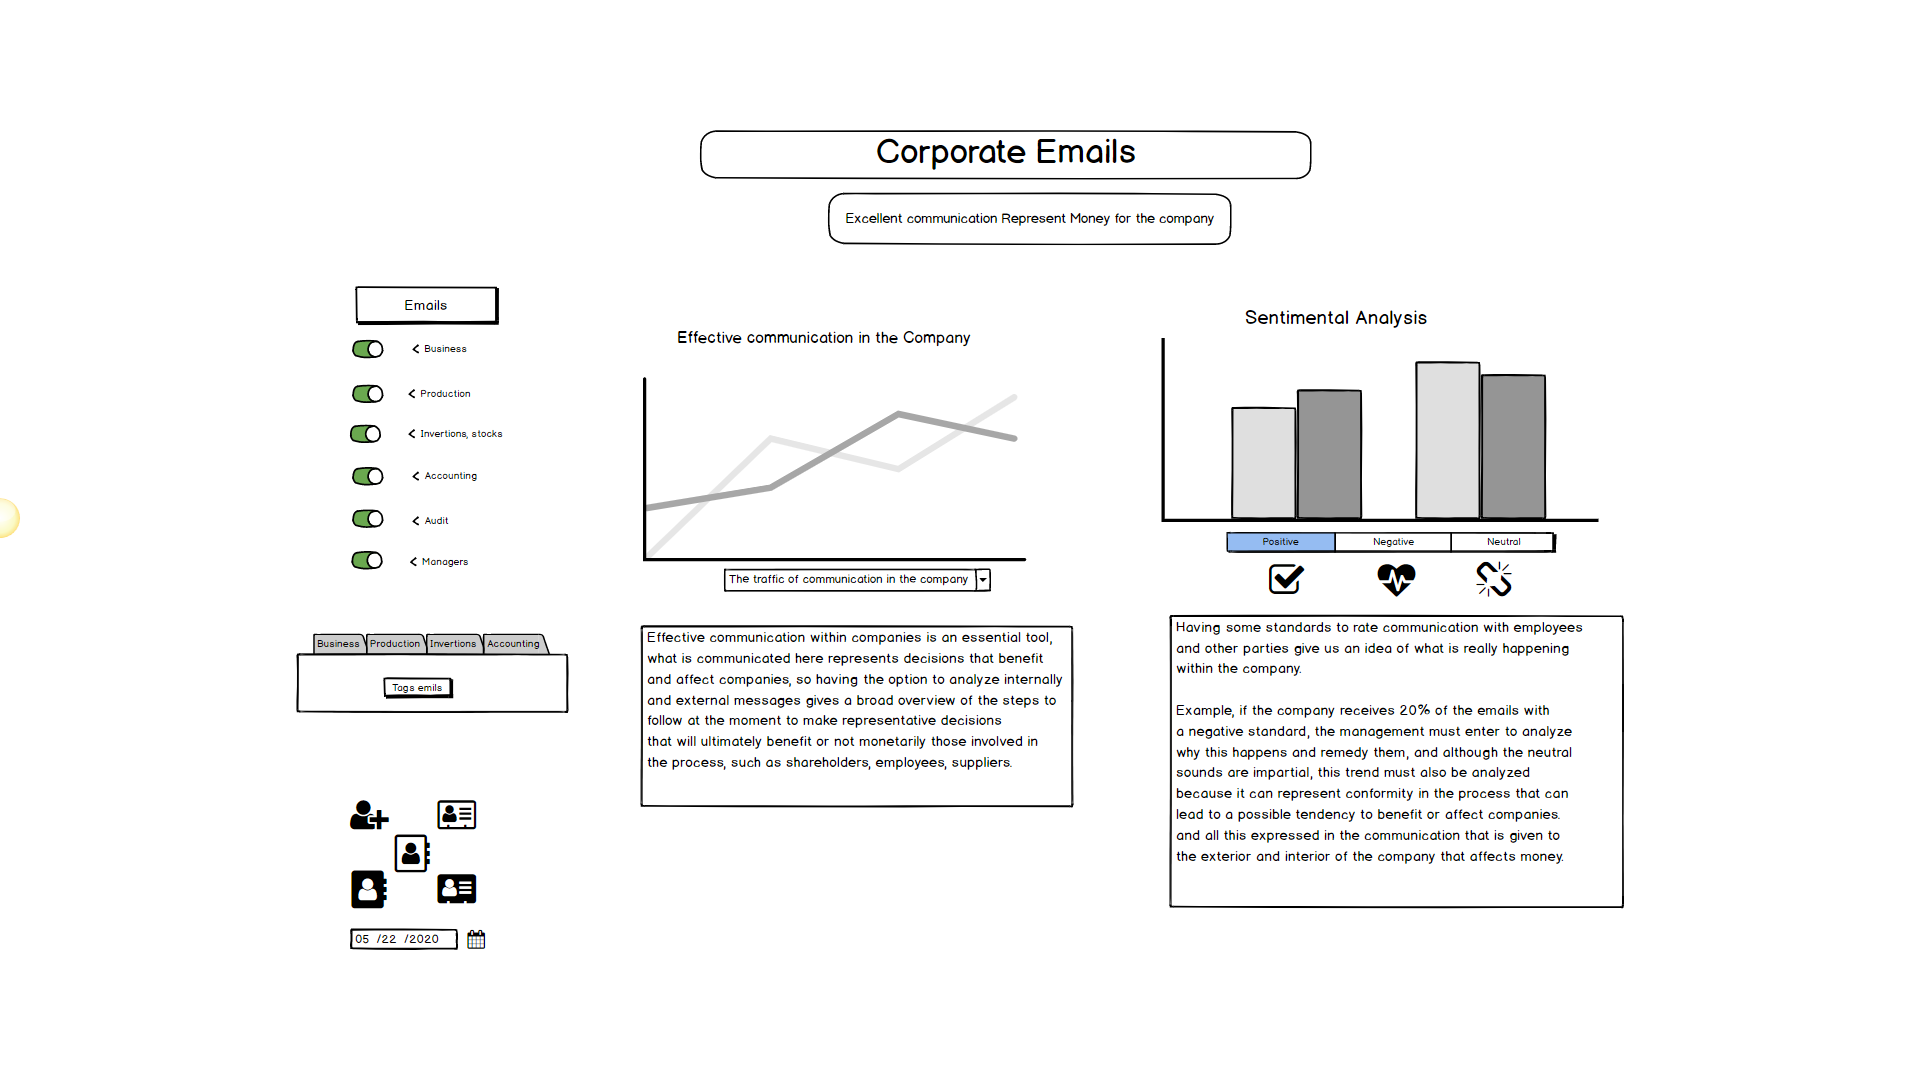

In [ ]:
from PIL import Image
# load the image
logo = Image.open('scheme.png')
logo

In [55]:
#Library
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
import spacy
import pandas as pd

In [56]:
%pwd

'/content'

In [57]:
import requests
url = 'https://raw.githubusercontent.com/Moly-malibu/Tag-Smart-Emails/master/Enronemails.csv?token=AN2RW2FUCTDZFLF7J7J6ISS67ELBM'
myfile = requests.get(url)
open('email.csv', 'wb').write(myfile.content)

24004915

In [58]:
#EMAILS FROM ENRON COMPANY SAMPLING
df = pd.read_csv("email.csv").drop(['Unnamed: 0'], axis=1)
print(df.shape) 
df.head(7)

(10000, 2)


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
5,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...
6,allen-p/_sent_mail/1003.,Message-ID: <16254169.1075863688286.JavaMail.e...


In [59]:
#TO GET EMAIL BODY
[s.strip() for s in df['message'][1].splitlines()]

['Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>',
 'Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)',
 'From: phillip.allen@enron.com',
 'To: john.lavorato@enron.com',
 'Subject: Re:',
 'Mime-Version: 1.0',
 'Content-Type: text/plain; charset=us-ascii',
 'Content-Transfer-Encoding: 7bit',
 'X-From: Phillip K Allen',
 'X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>',
 'X-cc:',
 'X-bcc:',
 "X-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail",
 'X-Origin: Allen-P',
 'X-FileName: pallen (Non-Privileged).pst',
 '',
 'Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.',
 '',
 'As far as the business meetings, I think it would be more productive to try and stimulate discussions across

In [60]:
#Extracted the data and to create new columns

dates = ' '.join([s.strip() for s in df['message'][1].splitlines()][1:2])
from_who = ' '.join([s.strip('') for s in df['message'][1].splitlines()][2:3])
to_who = ' '.join([s.strip('') for s in df['message'][1].splitlines()][3:4])
emails = ' '.join([s.strip() for s in df['message'][1].splitlines()][15:])

In [20]:
#Clean Data
def clean_email(email):
    return ' '.join([s.strip() for s in email.splitlines()][15:])
def clean_to_who(email):
    return ' '.join([s.strip() for s in email.splitlines()][3:4])
def clean_from_who(email):
    return ' '.join([s.strip() for s in email.splitlines()][2:3])
def clean_dates(email):
    return ' '.join([s.strip() for s in email.splitlines()][1:2])

df['email_body'] = df['message'].apply(clean_email)
df['to_who'] = df['message'].apply(clean_to_who)
df['from_who'] = df['message'].apply(clean_from_who)
df['dates'] = df['message'].apply(clean_dates)
df["email_body"].value_counts(sort=True).head()

 most bullish thing at this point is moving closer to everyone's psychological $4 price target and that everybody and their dog is still short.  next sellers need to be from producer community.  saw a little this week with williams hedging the barrett transaction but wouldnt say thats indicative of the rest of the e&p community.  short covering rallies will get more common here.  velocity of move down has slowed significantly for good (except maybe in bid week).  my concern is if we go to $4 and people want to cover some shorts, who's selling it to them?  might feel a lot like it did when we were trying to break $5.    9
 Let me know when you get the quotes from Pauline.  I am expecting to pay something in the $3,000 to $5,000 range.  I would like to see the quotes and a description of the work to be done.  It is my understanding that some rock will be removed and replaced with siding.  If they are getting quotes to put up new rock then we will need to clarify.  Jacques is ready to dro

In [21]:
#CLEAN HTML
import re
import html

def cleanup_html(raw_html):
    clean_html = re.sub(r'<.*?>', '', raw_html)
    clean_html_http = re.sub(r'http\S+([\.]{3})?', '', clean_html)
    clean_txt = html.unescape(clean_html)
    return clean_txt
df['email_body'] = df['email_body'].apply(cleanup_html)

In [22]:
df.sort_values(by='email_body', ascending=False).head(5)

,file,message,email_body,to_who,from_who,dates
9408,badeer-r/notes_inbox/62.,Message-ID: <22495830.1075863605235.JavaMail.e...,zalaywan@caiso.com Mime-Version: 1.0 Content-T...,To: 20participants@caiso.com,From: bwoertz@caiso.com,"Date: Thu, 24 Aug 2000 10:40:00 -0700 (PDT)"
9165,badeer-r/discussion_threads/215.,Message-ID: <26362480.1075863601560.JavaMail.e...,zalaywan@caiso.com Mime-Version: 1.0 Content-T...,To: 20participants@caiso.com,From: bwoertz@caiso.com,"Date: Thu, 24 Aug 2000 10:40:00 -0700 (PDT)"
8896,badeer-r/all_documents/62.,Message-ID: <9019069.1075863588438.JavaMail.ev...,zalaywan@caiso.com Mime-Version: 1.0 Content-T...,To: 20participants@caiso.com,From: bwoertz@caiso.com,"Date: Thu, 24 Aug 2000 10:40:00 -0700 (PDT)"
8306,arora-h/inbox/69.,Message-ID: <20199224.1075862674172.JavaMail.e...,"warrick.franklin@enron.com, paul.lewis@enron.c...","To: e-mail <.hai@enron.com>, e-mail <.harry@en...",From: michael.mattox@enron.com,"Date: Thu, 15 Nov 2001 09:47:18 -0800 (PST)"
8087,arora-h/deleted_items/183.,Message-ID: <19460356.1075861397603.JavaMail.e...,"warrick.franklin@enron.com, paul.lewis@enron.c...","To: e-mail <.hai@enron.com>, e-mail <.harry@en...",From: michael.mattox@enron.com,"Date: Thu, 15 Nov 2001 09:47:18 -0800 (PST)"


In [23]:
#CLEAN DATA
#remove whitespace
df['email_body'] = df['email_body'].str.strip().str.lower()

#Start with date
df['email_body'].str.match('\d?\d/\d?\d/\d{4}').all()

#Replace all non-overlapping matches
df['email_body'] = df['email_body'].str.replace('[^a-zA-Z\s]', '').str.replace('\s+', ' ')

In [24]:
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
#Getting Stopwords
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# define additional stop words
import nltk
import spacy

nlp = spacy.load('en_core_web_sm')

stop = stopwords.words('english')
sno = SnowballStemmer('english')
print (stop)
print('***************************************')
print(sno.stem('tasty'))

STOP_WORDS = list(STOP_WORDS)
print('\n'.join([word for word in STOP_WORDS[:10]]))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
tokens = []
for doc in nlp.pipe(df['email_body'], batch_size=500):

    doc_tokens = []

    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.lemma_.lower())

    tokens.append(doc_tokens)

df['smart_tags'] = tokens

In [27]:
df['smart_tags'].head()

0                                           [forecast]
1    [travel, business, meeting, take, fun, trip, e...
2                              [test, successful, way]
3    [randy, send, schedule, salary, level, schedul...
4                                [let, shoot, tuesday]
Name: smart_tags, dtype: object

In [28]:
df

,file,message,email_body,to_who,from_who,dates,smart_tags
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,here is our forecast,To: tim.belden@enron.com,From: phillip.allen@enron.com,"Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)",[forecast]
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,traveling to have a business meeting takes the...,To: john.lavorato@enron.com,From: phillip.allen@enron.com,"Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)","[travel, business, meeting, take, fun, trip, e..."
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful way to go,To: leah.arsdall@enron.com,From: phillip.allen@enron.com,"Date: Wed, 18 Oct 2000 03:00:00 -0700 (PDT)","[test, successful, way]"
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,randy can you send me a schedule of the salary...,To: randall.gay@enron.com,From: phillip.allen@enron.com,"Date: Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","[randy, send, schedule, salary, level, schedul..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,lets shoot for tuesday at,To: greg.piper@enron.com,From: phillip.allen@enron.com,"Date: Thu, 31 Aug 2000 05:07:00 -0700 (PDT)","[let, shoot, tuesday]"
...,...,...,...,...,...,...,...
9995,bass-e/_sent_mail/1047.,Message-ID: <21376194.1075854731510.JavaMail.e...,shes pretty sexy huh are we getting together t...,To: brian_hoskins@enron.com,From: eric.bass@enron.com,"Date: Tue, 25 Jan 2000 02:31:00 -0800 (PST)","[s, pretty, sexy, huh, get, talk, europe, tono..."
9996,bass-e/_sent_mail/1048.,Message-ID: <2401643.1075854731531.JavaMail.ev...,i copied your idea and it screwed up your name,To: danielles@jonesgranger.com,From: eric.bass@enron.com,"Date: Tue, 25 Jan 2000 02:15:00 -0800 (PST)","[copy, idea, screw]"
9997,bass-e/_sent_mail/1049.,Message-ID: <32002412.1075854731553.JavaMail.e...,forwarded by eric basshouect on am troy kluss...,To: david.baumbach@enron.com,From: eric.bass@enron.com,"Date: Tue, 25 Jan 2000 01:36:00 -0800 (PST)","[ , forward, eric, basshouect, troy, klussmann..."
9998,bass-e/_sent_mail/105.,Message-ID: <21429983.1075854709202.JavaMail.e...,did you buy any enron in the s,To: lwbthemarine@bigplanet.com,From: eric.bass@enron.com,"Date: Wed, 6 Dec 2000 06:03:00 -0800 (PST)","[buy, enron, s]"


In [29]:
id2word = Dictionary(df['smart_tags'])
print(len(id2word))

45828


In [30]:
id2word.filter_extremes(no_below=5, no_above=.98)
print(len(id2word))

14979


In [31]:
#https://radimrehurek.com/gensim/corpora/dictionary.html

corpus = [id2word.doc2bow(d) for d in df['smart_tags']]

In [32]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=12
                  )

In [33]:
model = LdaMulticore(corpus=corpus, num_topics=10, id2word=id2word, workers=12, passes=5)

In [34]:
import re

words = [re.findall(r'"([^"]*)"',t[1]) for t in model.print_topics()]

In [35]:
topics = [' '.join(t[0:5]) for t in words]

In [36]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n")

------ Topic 0 ------
john wine email subject pm
------ Topic 1 ------
price power subject gas energy
------ Topic 2 ------
message loan enron john email
------ Topic 3 ------
pm phillip subject k cc
------ Topic 4 ------
company enron new share subject
------ Topic 5 ------
john subject pm enron send
------ Topic 6 ------
enron say company energy market
------ Topic 7 ------
subject email john message enron
------ Topic 8 ------
market buy not say power
------ Topic 9 ------
image email market gas price


In [37]:
!pip install pyLDAvis
import pyLDAvis

     |████████████████████████████████| 1.6MB 8.3MB/s 
     |████████████████████████████████| 552kB 51.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=f36b95924bc69427f9d7737192386f5e22fc158be74aeecb146d5659379672b7
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=e4e241fa9bbb8d66a93da7ae2e43811cc80ba526d56d6544708d12d5640ef35e
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [38]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.155831  0.016677       1        1  22.265375
5     -0.013705 -0.018192       2        1  12.773182
8      0.095382 -0.028636       3        1  12.628139
9      0.007988 -0.004793       4        1   9.661907
7     -0.016300  0.004568       5        1   9.619160
0     -0.062091 -0.017602       6        1   8.130828
1      0.037423  0.014505       7        1   7.819785
3     -0.108243 -0.079029       8        1   7.477535
2     -0.087980  0.116220       9        1   6.196346
4     -0.008305 -0.003719      10        1   3.427739, topic_info=         Term         Freq        Total Category  logprob  loglift
173        pm  8516.000000  8516.000000  Default  30.0000  30.0000
2682    image  3711.000000  3711.000000  Default  29.0000  29.0000
92    company  5998.000000  5998.000000  Default  28.0000  28.0000
54    phillip  3835.000000  3835.000000  Default  27.0000  27.0000
193   subject  7656.000000  7656.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
57          s   110.886665  3826.191650  Topic10  -5.9071  -0.1678
72     follow    91.456184  1722.492188  Topic10  -6.0998   0.4376
528       say   100.057076  6018.914062  Topic10  -6.0099  -0.7237
962     email    98.836830  5962.705078  Topic10  -6.0222  -0.7265
38       time    97.004616  3887.593506  Topic10  -6.0409  -0.3175

[920 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
90         1  0.030643           
90         2  0.126714           
90         3  0.022361           
90         4  0.097727           
90         5  0.096071           
...      ...       ...        ...
11288      6  0.123629  zimmerman
11288      7  0.024726  zimmerman
11288      8  0.024726  zimmerman
11288      9  0.024726  zimmerman
11288     10  0.568692  zimmerman

[4690 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 9, 10, 8, 1, 2, 4, 3, 5])

In [39]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 8.1MB/s 


In [40]:
#Vander model
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer() 

def vaderizeSentiment(sentence):
    return analyzer.polarity_scores(sentence)

In [41]:
#creared columns score with numbers
df['Scores'] = df['email_body'].apply(vaderizeSentiment)

In [42]:
#Create score by differente classification position into the text
df[['negative', 'neutral', 'positive', 'compound']] = df.Scores.apply(pd.Series)

In [43]:
#Model to see final prediction
Model = SentimentIntensityAnalyzer()
def score(sentence, Model):
    return Model.polarity_scores(sentence)['compound']

# Sentiment score
df['final_score'] = df['email_body'].apply(lambda x: score(x, Model))

#Discretize variable.
df['final_prediction'] = pd.cut(df['final_score'], bins=5, labels=[1, 2, 3, 4, 5])
df = df.drop('final_score', axis=1).sort_values(by=['file','final_prediction']).iloc[:5]

In [44]:
#Pencentage in the classification.
df['final_prediction'].value_counts(normalize=True) * 100

3    40.0
5    20.0
4    20.0
2    20.0
1     0.0
Name: final_prediction, dtype: float64

##Example Presentation Sentimental Analysis in the App

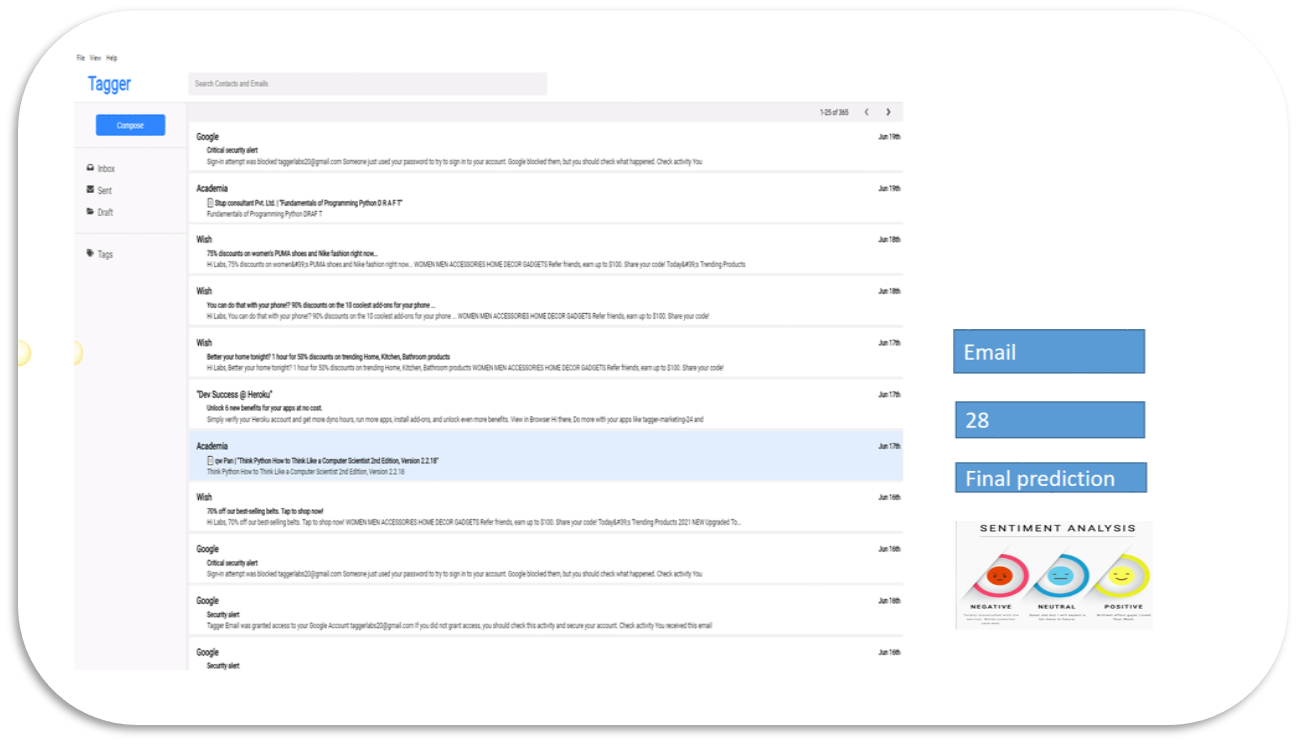

In [69]:
from PIL import Image
# load the image
Tags_emails = Image.open('Tags_emails.png')
Tags_emails

In [45]:
#created the new columns
import numpy as np

df['message_id'] = df.index + 1
df['user_tags'] = np.nan
df['thread_id'] = np.nan

In [46]:
df = df.drop(columns= ['file', 'message', 'Scores'])  

In [47]:
columns_names = ['message_id', 'to_who', 'from_who', 'email_body', 'smart_tags','negative', 'neutral', 'positive',
       'compound', 'final_pred', 'user_tags', 'thread_id']
Tags = df.reindex(columns=columns_names)
Tags

,message_id,to_who,from_who,email_body,smart_tags,negative,neutral,positive,compound,final_pred,user_tags,thread_id
0,1,To: tim.belden@enron.com,From: phillip.allen@enron.com,here is our forecast,[forecast],0.000,1.000,0.000,0.0000,NaN,NaN,NaN
1,2,To: john.lavorato@enron.com,From: phillip.allen@enron.com,traveling to have a business meeting takes the...,"[travel, business, meeting, take, fun, trip, e...",0.000,0.893,0.107,0.9313,NaN,NaN,NaN
2,3,To: leah.arsdall@enron.com,From: phillip.allen@enron.com,test successful way to go,"[test, successful, way]",0.000,0.513,0.487,0.5859,NaN,NaN,NaN
3,4,To: randall.gay@enron.com,From: phillip.allen@enron.com,randy can you send me a schedule of the salary...,"[randy, send, schedule, salary, level, schedul...",0.000,1.000,0.000,0.0000,NaN,NaN,NaN
4,5,To: greg.piper@enron.com,From: phillip.allen@enron.com,lets shoot for tuesday at,"[let, shoot, tuesday]",0.375,0.625,0.000,-0.3400,NaN,NaN,NaN


##Graphics Sentimental Analysis

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


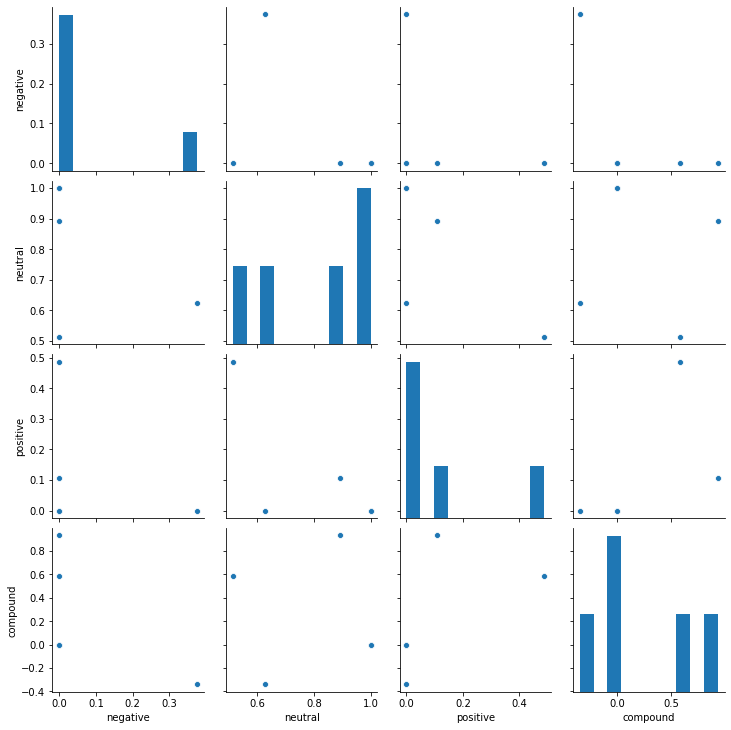

In [48]:
import seaborn as sns
sns.pairplot(df[['negative', 'neutral', 'positive', 'compound']]);

In [51]:

import plotly.express as px

fig = px.histogram(df, x='final_prediction', template='plotly_white', title='Email Sentimental Analysis')
fig.update_xaxes(categoryorder='total descending').update_yaxes(title='Emails Tendence')
fig.show()

In [50]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=['negative', 'neutral', 'positive', 'compound']))
fig.show()

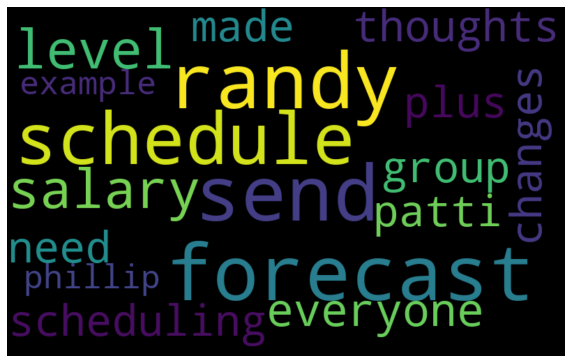

In [52]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

normal_words =' '.join([text for text in df['email_body'][df['neutral'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

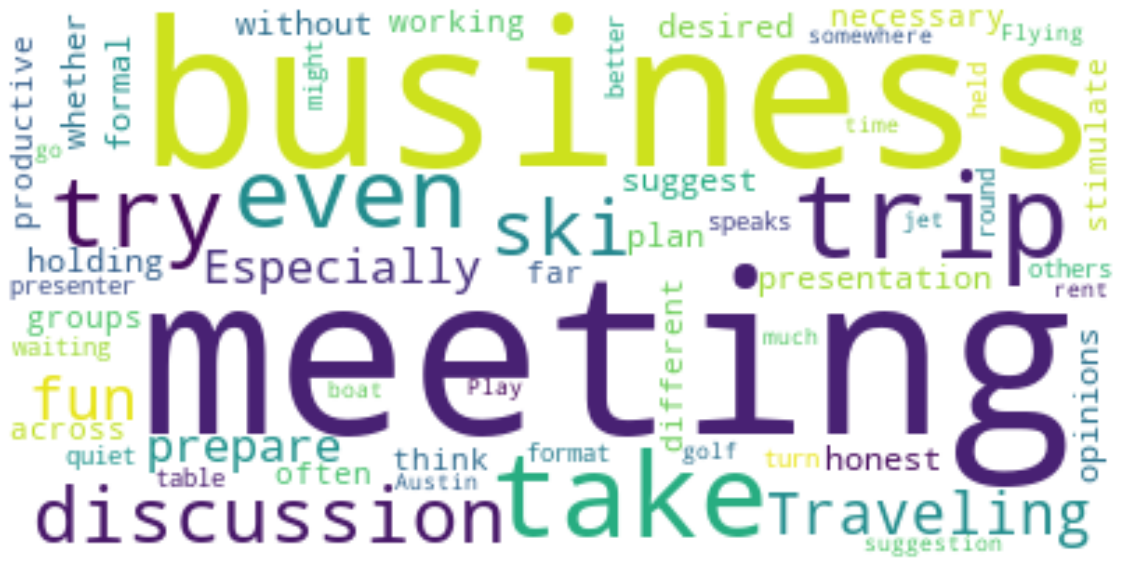

In [61]:
wordcloud_spam = WordCloud(background_color="white").generate(emails)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

##Random Forest Classification final Prediction Models

In [64]:
#Data Merge Models Sentimental Analysis and LDA 

import requests
url = 'https://raw.githubusercontent.com/Lambda-School-Labs/tagger-ds/master/notebooks/merged_data_for_KNN_with_body.csv'
myfile = requests.get(url)
open('email.csv', 'wb').write(myfile.content)

29340319

In [65]:
import pandas as pd

df = pd.read_csv("email.csv").drop(columns = ['subject', 
                                              'content_type', 'dates',
                                              'negative.1', 'neutral.1', 'positive.1', 'compound.1',
                                              'final_pred.1'
                                               ])

In [66]:
#Reindex the columns
columns_names = ['message_id', 'to_who', 'from_who', 'email_body', 'smart_tags','negative', 'neutral', 'positive',
       'compound', 'final_pred', 'user_tags',
       'thread_id']
Tags = df.reindex(columns=columns_names)
Tags

,message_id,to_who,from_who,email_body,smart_tags,negative,neutral,positive,compound,final_pred,user_tags,thread_id
0,1,NaN,From: phillip.allen@enron.com,here is our forecast,['forecast'],0.000,1.000,0.000,0.0000,3,NaN,NaN
1,2,NaN,From: phillip.allen@enron.com,traveling to have a business meeting takes the...,"['travel', 'business', 'meeting', 'take', 'fun...",0.000,0.893,0.107,0.9313,5,NaN,NaN
2,3,NaN,From: phillip.allen@enron.com,test successful way to go,"['test', 'successful', 'way']",0.000,0.513,0.487,0.5859,4,NaN,NaN
3,4,NaN,From: phillip.allen@enron.com,randy can you send me a schedule of the salary...,"['randy', 'send', 'schedule', 'salary', 'level...",0.000,1.000,0.000,0.0000,3,NaN,NaN
4,5,NaN,From: phillip.allen@enron.com,lets shoot for tuesday at,"['let', 'shoot', 'tuesday']",0.375,0.625,0.000,-0.3400,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,NaN,From: eric.bass@enron.com,shes pretty sexy huh are we getting together t...,"['s', 'pretty', 'sexy', 'huh', 'get', 'talk', ...",0.031,0.799,0.170,0.9895,5,NaN,NaN
9996,9997,NaN,From: eric.bass@enron.com,i copied your idea and it screwed up your name,"['copy', 'idea', 'screw']",0.262,0.738,0.000,-0.4939,2,NaN,NaN
9997,9998,NaN,From: eric.bass@enron.com,forwarded by eric basshouect on am troy kluss...,"[' ', 'forward', 'eric', 'basshouect', 'troy',...",0.000,0.914,0.086,0.4404,4,NaN,NaN
9998,9999,NaN,From: eric.bass@enron.com,did you buy any enron in the s,"['buy', 'enron', 's']",0.000,1.000,0.000,0.0000,3,NaN,NaN


In [67]:
# Feature / target split
X = Tags['smart_tags']
y = Tags['final_pred']

In [68]:
# Do a train / test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape,y_train.shape, X_test.shape,y_test.shape

((7500,), (7500,), (2500,), (2500,))

In [6]:
from sklearn.ensemble import RandomForestClassifier
import spacy

nlp = spacy.load('en_core_web_sm')

# Vectorize
def embed(docs):
    return [nlp(doc).vector for doc in docs]

# model
classifier = RandomForestClassifier(n_estimators=100, random_state=107,
                                   max_depth=7)
# Fit the model on training data
classifier.fit(embed(X_train), y_train)

# Get predictions
pred = classifier.predict(embed(X_test))

In [7]:
classifier.score(embed(X_test), y_test)

0.7476

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
rfc = RandomForestClassifier()

In [9]:
from sklearn.decomposition import TruncatedSVD

# Singular value decomposition
svd = TruncatedSVD(n_components=100, # Just here for demo. 
                   algorithm='randomized',
                   n_iter=10)


# LSI: Latent semantic indexing
lsi = Pipeline([('vect', vect), ('svd', svd)])

In [10]:
from sklearn.model_selection import GridSearchCV
# Pipeline
pipe = Pipeline([
                 #Vectorrizer
                 ('vect', vect),
                 #Classifier
                 ('clf', rfc)
                ])

In [11]:
parameters = {
    'vect__max_df': ( 0.75, 1.0),
    'vect__min_df': (.02, .05),
    'vect__max_features': (500,1000),
    'clf__n_estimators':(5, 10,),
    'clf__max_depth':(15,20)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  5.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [12]:
accuracy = grid_search.best_score_

In [13]:
accuracy

0.8305333333333333

In [ ]:
df.to_csv('Topics_LDA.csv', index=False)

Json and CSV

In [ ]:
def save_data_frame_as_csv(df=None, file=None):
    """
    Save a Pandas DataFrame to CSV format.
    """
    try:
        if not file.endswith('.csv'):
            file += '.csv'
        df.to_csv(file, index=False)
        print(f'DataFrame saved as: {file}')
    except Exception as e:
        print("DataFrame couldn't be saved: ", sys.exc_info()[0])
        raise

In [ ]:
save_data_frame_as_csv(df, './merged_data.csv')

In [ ]:
def save_data_frame_as_json(df=None, file=None, orient='records'):
  """
  Save a Pandas DataFrame to Json format.
  """
  try:
    if not file.endswith('.json'):
      file += '.json'
    df.to_json(file, orient=orient)
    print(f'Dataframe saved as: {file}')
  except Exception as e:
    print("Dataframe couldn't be saved: ", sys.exc_info()[0])
    raise

In [ ]:
save_data_frame_as_json(df, '.merged_data.json', orient='records')